In [1]:
import json
import os
import pickle
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from transformers import pipeline
from wordcloud import WordCloud


# Classify Rants

In [2]:
classifier = pipeline(
    task="text-classification",
    model="SamLowe/roberta-base-go_emotions",
    device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"),
    use_fast=True,
    trust_remote_code=True,
    top_k=1,
)


In [3]:
with open("./data/rants.txt", mode="r", encoding="utf-8") as fo:
    rants = list(map(lambda x: x.strip(), fo.readlines()))
    results = list(map(lambda x: x[0], classifier(rants)))


In [4]:
# print

pprint(results[:10])


[{'label': 'disapproval', 'score': 0.7749039530754089},
 {'label': 'anger', 'score': 0.6869187951087952},
 {'label': 'annoyance', 'score': 0.6924078464508057},
 {'label': 'annoyance', 'score': 0.5394007563591003},
 {'label': 'anger', 'score': 0.647173285484314},
 {'label': 'annoyance', 'score': 0.4989789128303528},
 {'label': 'annoyance', 'score': 0.5435047149658203},
 {'label': 'disapproval', 'score': 0.7160939574241638},
 {'label': 'sadness', 'score': 0.41347581148147583},
 {'label': 'annoyance', 'score': 0.5151220560073853}]


# Save Results

In [5]:
# save results to file

json.dump(results, open("./data/results.json", mode="w", encoding="utf-8"))
pickle.dump(results, open("./data/results.pickle", mode="wb"))


# Convert to DataFrame


In [6]:
df = pd.DataFrame(results)


In [7]:
df.head()


,label,score
0,disapproval,0.774904
1,anger,0.686919
2,annoyance,0.692408
3,annoyance,0.539401
4,anger,0.647173


# Plot Results

In [8]:
if not os.path.exists("./plots/"):
    os.makedirs("./plots/")


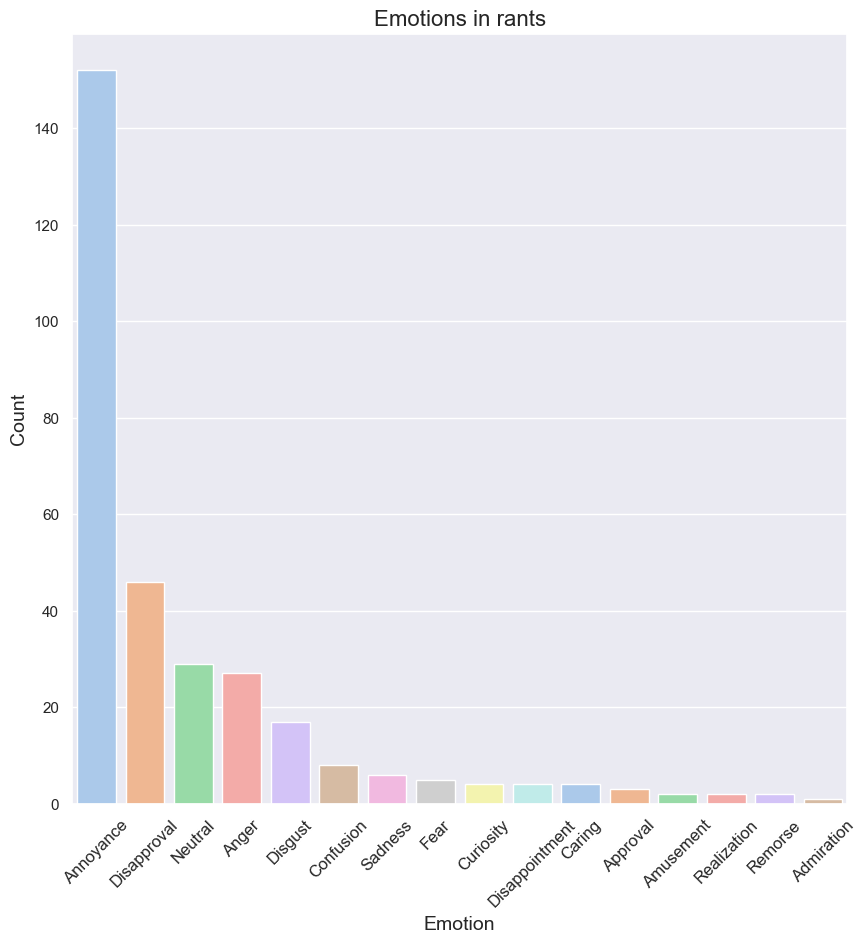

In [9]:
# barplot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.title("Emotions in rants", fontsize=16)
plt.xlabel("Emotion", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
sns.barplot(
    x=df["label"].value_counts().index.str.title(),
    y=df["label"].value_counts(),
    palette="pastel",
    hue=df["label"].value_counts().index.str.title(),
    legend=False,
)
plt.savefig("./plots/barplot.png", dpi=300)
plt.show()


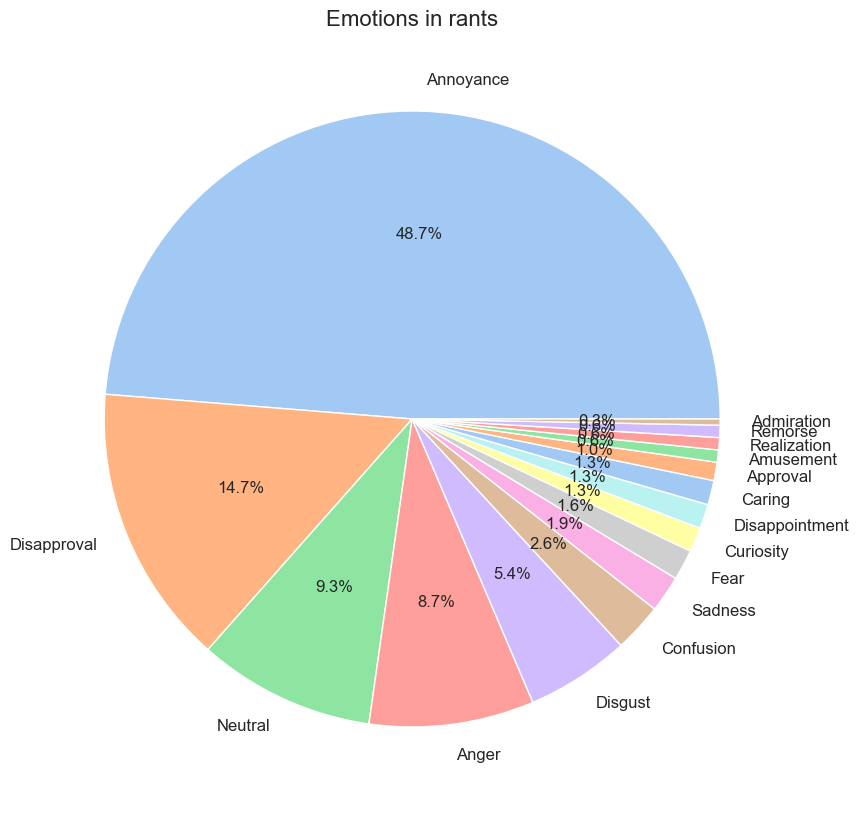

In [10]:
# piechart
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.title("Emotions in rants", fontsize=16)
colors = sns.color_palette("pastel")
plt.pie(
    df["label"].value_counts(),
    labels=df["label"].value_counts().index.str.title(),
    autopct="%1.1f%%",
    textprops={"fontsize": 12},
    colors=colors,
)
plt.savefig("./plots/piechart.png", dpi=300)
plt.show()


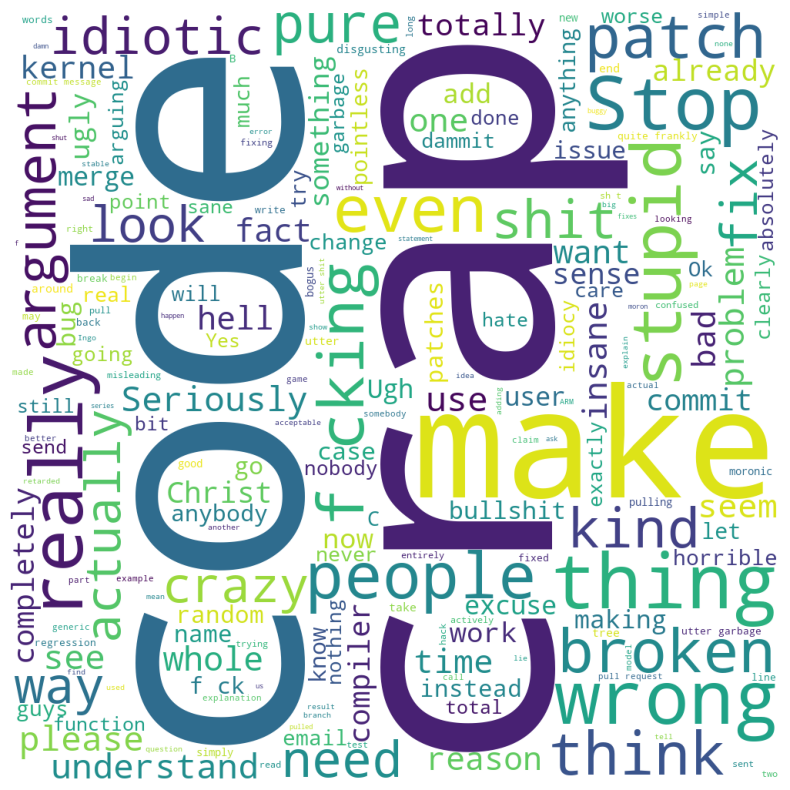

In [11]:
# wordcloud

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(
    WordCloud(background_color="white", width=1000, height=1000).generate(
        " ".join(rants)
    )
)
plt.savefig("./plots/wordcloud.png", dpi=300)
plt.show()
